# True strength index (TSI)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.momentum import TSIIndicator

In [7]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations¶

In [10]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "tsi_"
    for w in windows:
        wl = w*2
        i = TSIIndicator(df.close, wl, w)
        sma_name = name + str(w)
        df[sma_name] = list(map(lambda x: uf.log_abs(x*100, zeros=True), i.tsi()))


In [11]:
variations([10, 15, 20, 25, 30, 50, 100])

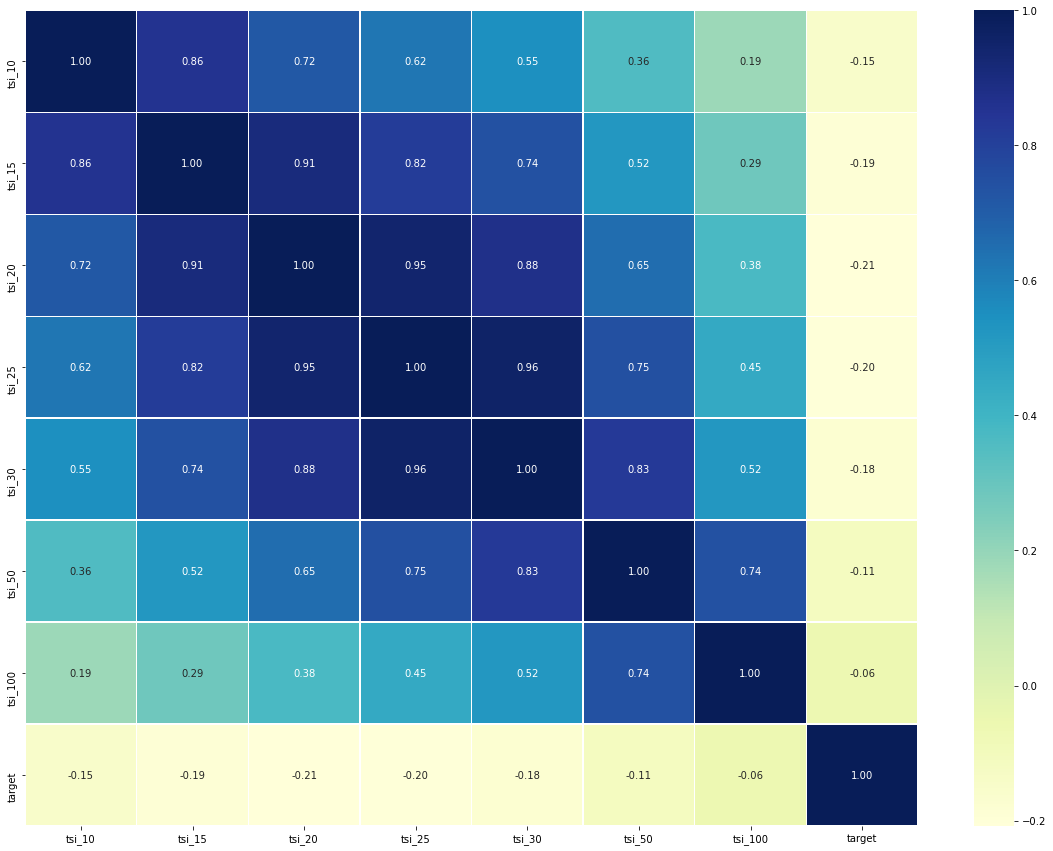

In [12]:
indicators = list(df.columns)[13:]
indicators.append("target")
d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

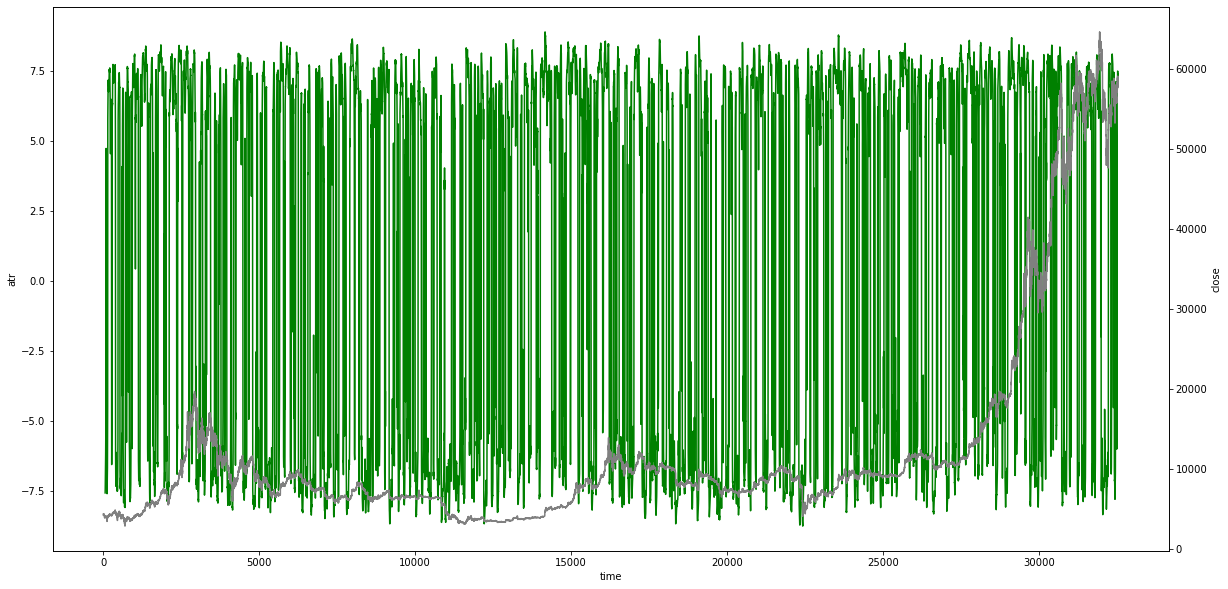

In [13]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.tsi_20,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Conclusion: 

- tsi_20_log